<a href="https://colab.research.google.com/github/OdysseusPolymetis/philo_num_grenoble_24/blob/main/cltk_for_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.8/849.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.7/193.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 933.2/933.2 kB 22.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.5/397.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.0 

In [ ]:
!git clone https://github.com/PerseusDL/treebank_data.git

Cloning into 'treebank_data'...
remote: Enumerating objects: 2635, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 2635 (delta 144), reused 216 (delta 142), pack-reused 2411
Receiving objects: 100% (2635/2635), 75.59 MiB | 19.63 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.
Updating files: 100% (275/275), done.


In [ ]:
greek_dir = '/content/treebank_data/v2.1/Greek/texts'
latin_dir = '/content/treebank_data/v2.1/Latin/texts'

In [ ]:
import os
import xml.etree.ElementTree as ET
from cltk.data.fetch import FetchCorpus
from cltk import NLP

In [ ]:
corpus_importer = FetchCorpus(language="grc")
corpus_importer.import_corpus("grc_models_cltk")

INFO:CLTK:Cloning 'grc_models_cltk' from 'https://github.com/cltk/grc_models_cltk.git'


In [ ]:
def parse_treebank_file(file_path):

    tree = ET.parse(file_path)
    root = tree.getroot()

    indexed_gold_sentences = []
    file_id1 = os.path.basename(file_path)
    print(file_id1)
    print(len(root.findall('.//sentence')))

    for i, sentence in enumerate(root.findall('.//sentence')):
        words = []
        for word in sentence.findall('.//word'):
            words.append({
                'form': word.get('form'),
                'lemma': word.get('lemma'),
                'postag': word.get('postag'),
                'relation': word.get('relation'),
                'head': word.get('head')
            })
        indexed_gold_sentences.append((file_id1,i, words))
    return indexed_gold_sentences

In [ ]:
def process_gold_directory(directory, filter_text):
    all_sentences = []

    for root, dirs, files in os.walk(directory):
        for file in files:
            if filter_text in file:
                file_path = os.path.join(root, file)
                sentences = parse_treebank_file(file_path)

                for sentence in sentences:
                    all_sentences.append(sentence)

                print(f"Processed {file_path}")

    return all_sentences

In [ ]:
treebank_sentences=process_gold_directory(greek_dir, 'tlg0012')

tlg0012.tlg002.perseus-grc1.tb.xml
6723
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml
tlg0012.tlg001.perseus-grc1.tb.xml
8415
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml


In [ ]:
def parse_treebank_file(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()

    file_id2 = os.path.basename(file_path)

    sentences = []
    for i, sentence in enumerate(root.findall('.//sentence')):
        words = [word.get('form') for word in sentence.findall('.//word')]
        sentence_text = ' '.join(words)
        sentences.append((file_id2, i, sentence_text))
    return sentences

In [ ]:
def analyze_with_cltk(sentences, language):
    cltk_nlp = NLP(language=language)
    cltk_nlp.pipeline.processes = cltk_nlp.pipeline.processes[:-2]
    analyzed_sentences = []
    for file_id2, index, sentence in sentences:
            doc = cltk_nlp.analyze(text=sentence)
            if doc and doc.words:
                analyzed_sentences.append((file_id2, index, doc))
    return analyzed_sentences

In [ ]:
def process_directory(directory, filter_text, language, nb_of_sentences):
  all_sentences = []
  for root, dirs, files in os.walk(directory):
    for file in files:
      if filter_text in file:
        file_path = os.path.join(root, file)
        sentences = parse_treebank_file(file_path)
        all_sentences.extend(sentences)
        print(f"Processed {file_path}")
  analyzed_sentences = analyze_with_cltk(all_sentences[:nb_of_sentences], language)
  return analyzed_sentences

In [ ]:
nb_of_sentences=100
cltk_sentences = process_directory(greek_dir, 'tlg0012', 'grc', nb_of_sentences)

Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg002.perseus-grc1.tb.xml
Processed /content/treebank_data/v2.1/Greek/texts/tlg0012.tlg001.perseus-grc1.tb.xml
‎𐤀 CLTK version '1.2.1'. When using the CLTK in research, please cite: https://aclanthology.org/2021.acl-demo.3/

Pipeline for language 'Ancient Greek' (ISO: 'grc'): `GreekNormalizeProcess`, `GreekStanzaProcess`, `GreekEmbeddingsProcess`, `StopsProcess`.

⸖ ``LatinSpacyProcess`` using Stanza model by Stanford University from https://stanfordnlp.github.io/stanza/ . Please cite: https://arxiv.org/abs/2003.07082
⸖ ``LatinEmbeddingsProcess`` using word2vec model by University of Oslo from http://vectors.nlpl.eu/ . Please cite: https://aclanthology.org/W17-0237/

⸎ To suppress these messages, instantiate ``NLP()`` with ``suppress_banner=True``.
CLTK message: This part of the CLTK depends upon the Stanza NLP library.
CLTK message: Allow download of Stanza models to ``/root/stanza_resources/grc/tokenize/perseus.pt``? [Y/n] 
y

INFO:stanza:Downloading these customized packages for language: grc (Ancient_Greek)...
| Processor | Package          |
--------------------------------
| tokenize  | perseus          |
| pos       | perseus_nocharlm |
| lemma     | perseus_nocharlm |
| depparse  | perseus_nocharlm |
| pretrain  | conll17          |



INFO:stanza:Finished downloading models and saved to /root/stanza_resources.


In [ ]:
def compare_results(treebank_sentences, cltk_sentences):
    for (file_id_tb, index_tb, sentence_tb), (file_id_cltk, index_cltk, sentence_cltk) in zip(treebank_sentences, cltk_sentences):
        print(file_id_tb)
        if file_id_tb == file_id_cltk and index_tb == index_cltk:
            if file_id_tb==file_id_cltk and index_tb==index_cltk :
              print("treebank : "+str(sentence_tb))
              print("cltk data : "+str(sentence_cltk))
            pass

In [ ]:
compare_results(treebank_sentences, cltk_sentences)

tlg0012.tlg002.perseus-grc1.tb.xml
treebank : [{'form': 'ἄνδρα', 'lemma': 'ἀνήρ', 'postag': 'n-s---ma-', 'relation': 'OBJ', 'head': '3'}, {'form': 'μοι', 'lemma': 'ἐγώ', 'postag': 'p-s---md-', 'relation': 'OBJ', 'head': '3'}, {'form': 'ἔννεπε', 'lemma': 'ἐνέπω', 'postag': 'v2spma---', 'relation': 'PRED', 'head': '0'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '5'}, {'form': 'μοῦσα', 'lemma': 'Μοῦσα', 'postag': 'n-s---fv-', 'relation': 'ExD', 'head': '3'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '5'}, {'form': 'πολύτροπον', 'lemma': 'πολύτροπος', 'postag': 'a-s---ma-', 'relation': 'ATR', 'head': '1'}, {'form': ',', 'lemma': ',', 'postag': 'u--------', 'relation': 'AuxX', 'head': '12'}, {'form': 'ὃς', 'lemma': 'ὅς', 'postag': 'p-s---mn-', 'relation': 'SBJ', 'head': '12'}, {'form': 'μάλα', 'lemma': 'μάλα', 'postag': 'd--------', 'relation': 'AuxZ', 'head': '11'}, {'form': 'πολλὰ', 'lemma': 'πολύς', 'postag': 'd---

In [ ]:
def compare_annotations(tb_sentence, cltk_tuple):
    error_details = {
        'lemma_errors': [],
        'pos_errors': []
    }

    file_id2, index, cltk_doc = cltk_tuple

    for tb_word, cltk_word in zip(tb_sentence[2], cltk_doc.words):
        if tb_word['lemma'] != cltk_word.lemma:
            error_details['lemma_errors'].append({
                'word': tb_word['form'],
                'tb_lemma': tb_word['lemma'],
                'cltk_lemma': cltk_word.lemma
            })

        if tb_word['postag'] != cltk_word.xpos:
            error_details['pos_errors'].append({
                'word': tb_word['form'],
                'tb_pos': tb_word['postag'],
                'cltk_pos': cltk_word.xpos
            })

    return error_details

all_errors = {
    'lemma_errors': [],
    'pos_errors': []
}

for tb_sentence, cltk_tuple in zip(treebank_sentences, cltk_sentences):
    errors = compare_annotations(tb_sentence, cltk_tuple)
    all_errors['lemma_errors'].extend(errors['lemma_errors'])
    all_errors['pos_errors'].extend(errors['pos_errors'])

print("Lemma Errors:", all_errors['lemma_errors'])
print("POS Errors:", all_errors['pos_errors'])


Lemma Errors: [{'word': 'μοῦσα', 'tb_lemma': 'Μοῦσα', 'cltk_lemma': 'μόσος'}, {'word': 'ὃν', 'tb_lemma': 'ὅς', 'cltk_lemma': 'ἑός'}, {'word': 'ἥν', 'tb_lemma': 'ὅς', 'cltk_lemma': 'ἑός'}, {'word': 'οἳ', 'tb_lemma': 'ὅς', 'cltk_lemma': 'ὁ'}, {'word': 'ἤσθιον', 'tb_lemma': 'ἐσθίω', 'cltk_lemma': 'ἀσθίω'}, {'word': 'πότνἰ', 'tb_lemma': 'πότνια', 'cltk_lemma': 'πότνἰ'}, {'word': 'Καλυψὼ', 'tb_lemma': 'Καλυψώ', 'cltk_lemma': 'καλυψώ'}, {'word': 'σπέσσι', 'tb_lemma': 'σπέος', 'cltk_lemma': 'σπές'}, {'word': 'οἱ', 'tb_lemma': 'ὁ', 'cltk_lemma': 'ἕ'}, {'word': 'οὐδ̓', 'tb_lemma': 'οὐδέ', 'cltk_lemma': 'οὐδε'}, {'word': 'ἣν', 'tb_lemma': 'ὅς', 'cltk_lemma': 'ἑός'}, {'word': 'τηλόθ̓', 'tb_lemma': 'τηλόθι', 'cltk_lemma': 'τηλόθε'}, {'word': 'οἱ', 'tb_lemma': 'ὁ', 'cltk_lemma': 'ἕ'}, {'word': '[0]', 'tb_lemma': None, 'cltk_lemma': 'ἵμνω'}, {'word': '[1]', 'tb_lemma': None, 'cltk_lemma': '[1'}, {'word': 'ὅ', 'tb_lemma': 'ὅς', 'cltk_lemma': 'ὁ'}, {'word': 'παρήμενος', 'tb_lemma': '', 'cltk_lemma': 

In [ ]:
from collections import Counter

# Filtrer les erreurs POS en excluant 'g', 'd', et 'b'
filtered_pos_errors = [error for error in all_errors['pos_errors']
                       if error['tb_pos'] is not None and
                          error['tb_pos'][0] not in ['g', 'd', 'b']]

# Compter les erreurs en ne tenant compte que des erreurs filtrées
pos_error_counts = Counter([error['tb_pos'][0] for error in filtered_pos_errors])

print(pos_error_counts)

Counter({'v': 57, 'n': 43, 'l': 31, 'a': 31, 'p': 30, 'u': 14, 'c': 10, '-': 4, 'r': 3})


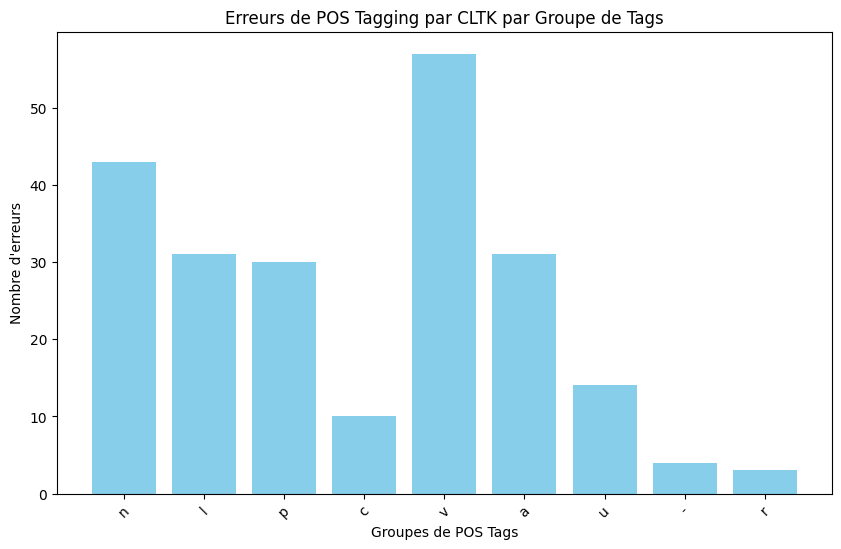

In [ ]:
import matplotlib.pyplot as plt

pos_groups = list(pos_error_counts.keys())
errors = list(pos_error_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(pos_groups, errors, color='skyblue')
plt.xlabel('Groupes de POS Tags')
plt.ylabel('Nombre d\'erreurs')
plt.title('Erreurs de POS Tagging par CLTK par Groupe de Tags')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import csv
output_file = '/content/cltk_results.csv'

# Écriture dans le fichier CSV
with open(output_file, mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # En-têtes
    writer.writerow(['Word', 'TB Lemma', 'cltk Lemma', 'TB POS', 'cltk POS'])

    for error in all_errors['lemma_errors']:
        writer.writerow([error['word'], error['tb_lemma'], error['cltk_lemma'], '', ''])

    for error in all_errors['pos_errors']:
        writer.writerow([error['word'], '', '', error['tb_pos'], error['cltk_pos']])